In [2]:
# Import libraries here
import json
import pickle
import pandas as pd
import  gzip
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import RandomOverSampler
from sklearn.impute import SimpleImputer
from sklearn.metrics import  ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV,cross_val_score,train_test_split
from sklearn.metrics import(
                     classification_report,
                    confusion_matrix
)
import ipywidgets as widgets
from ipywidgets import interact


In [4]:
#import the csv file with the data
df=pd.read_csv("bankruptcy_italian_companies_2023.csv")
df.head()

,Company,Bankrupt,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,A0001,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,A0002,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,A0003,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,A0004,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,A0005,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490


In [5]:
#inspecting the data in df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 97 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Company                                                   6819 non-null   object 
 1   Bankrupt                                                  6819 non-null   int64  
 2    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 3    ROA(A) before interest and % after tax                   6819 non-null   float64
 4    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 5    Operating Gross Margin                                   6819 non-null   float64
 6    Realized Sales Gross Margin                              6819 non-null   float64
 7    Operating Profit Rate                                    6819 non-null   float64
 8    Pre-tax net Inter

In [6]:
#checking for null values in the data frame and asserting if there are non
missing_cols = df.isnull().sum()[df.isnull().sum() > 0]
print(missing_cols if len(missing_cols) > 0 else "No missing values!")

No missing values!


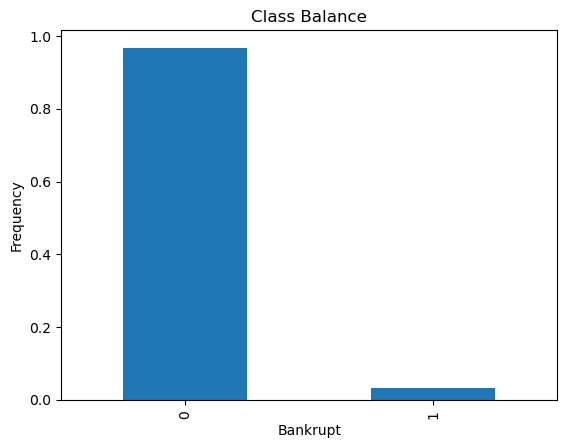

In [7]:
# Plot class balance
# Plot class balance

fig,ax=plt.subplots()
df["Bankrupt"].value_counts(normalize=True).plot(
    kind="bar",
     xlabel="Bankrupt",
     ylabel="Frequency",
     title="Class Balance"
);
plt.savefig('class_balance.png', dpi=100, bbox_inches='tight')

In [8]:
df.describe()

,Bankrupt,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
count,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,...,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.0,6819.000000
mean,0.032263,0.505180,0.558625,0.553589,0.607948,0.607929,0.998755,0.797190,0.809084,0.303623,...,0.807760,1.862942e+07,0.623915,0.607946,0.840402,0.280365,0.027541,0.565358,1.0,0.047578
std,0.176710,0.060686,0.065620,0.061595,0.016934,0.016916,0.013010,0.012869,0.013601,0.011163,...,0.040332,3.764501e+08,0.012290,0.016934,0.014523,0.014463,0.015668,0.013214,0.0,0.050014
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000
25%,0.000000,0.476527,0.535543,0.527277,0.600445,0.600434,0.998969,0.797386,0.809312,0.303466,...,0.796750,9.036205e-04,0.623636,0.600443,0.840115,0.276944,0.026791,0.565158,1.0,0.024477
50%,0.000000,0.502706,0.559802,0.552278,0.605997,0.605976,0.999022,0.797464,0.809375,0.303525,...,0.810619,2.085213e-03,0.623879,0.605998,0.841179,0.278778,0.026808,0.565252,1.0,0.033798
75%,0.000000,0.535563,0.589157,0.584105,0.613914,0.613842,0.999095,0.797579,0.809469,0.303585,...,0.826455,5.269777e-03,0.624168,0.613913,0.842357,0.281449,0.026913,0.565725,1.0,0.052838
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,9.820000e+09,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000


In [9]:
#confirming the real name of the column
print(df.columns[df.columns.str.contains('Net Income', case=False)])

Index([' Net Income to Total Assets', ' Net Income to Stockholder's Equity',
       ' Net Income Flag'],
      dtype='object')


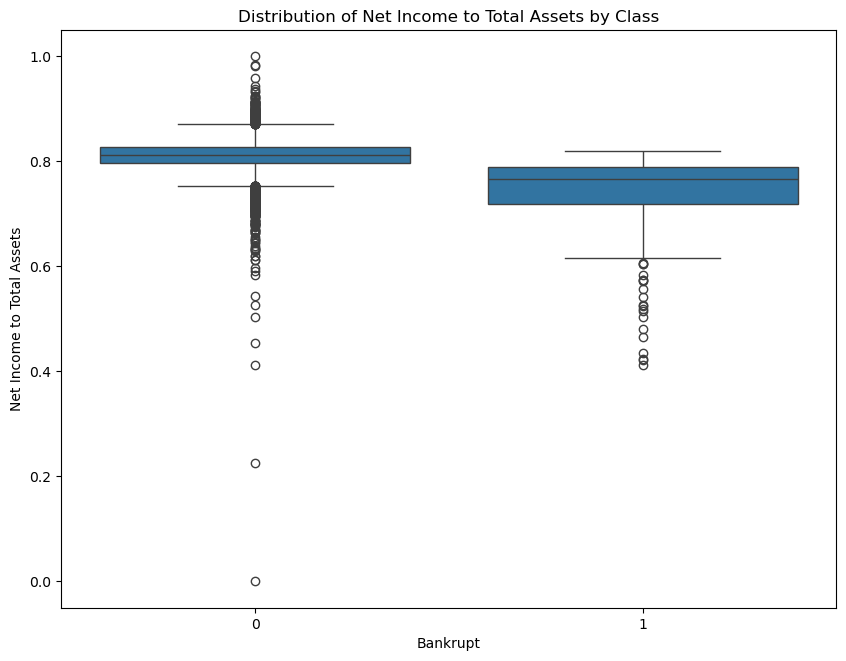

In [10]:


# Inspecting one of the features
fig, ax = plt.subplots(figsize=(10, 7.5))
sns.boxplot(x="Bankrupt", y=' Net Income to Total Assets', data=df, ax=ax)
ax.set_xlabel("Bankrupt")
ax.set_ylabel("Net Income to Total Assets")
ax.set_title("Distribution of Net Income to Total Assets by Class")
plt.savefig('Distribution of Net Income to Total Assets by Class.png', dpi=100, bbox_inches='tight', facecolor='white')
plt.show()


In [11]:
#statistical summarry  for feature Net Income to Total Assets
df[' Net Income to Total Assets'].describe()

count    6819.000000
mean        0.807760
std         0.040332
min         0.000000
25%         0.796750
50%         0.810619
75%         0.826455
max         1.000000
Name:  Net Income to Total Assets, dtype: float64

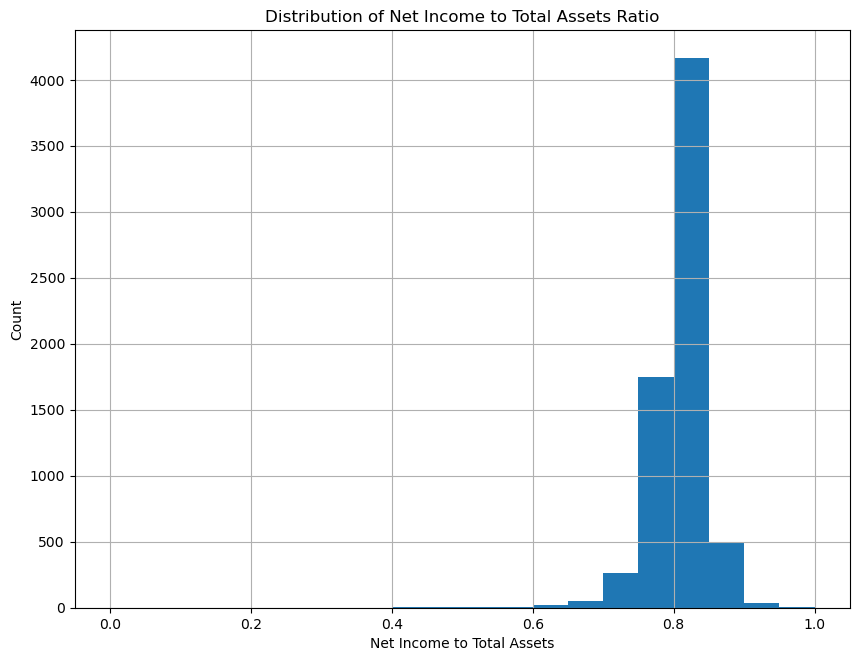

In [12]:
fig, ax = plt.subplots(figsize=(10, 7.5))
df[' Net Income to Total Assets'].hist(ax=ax, bins=20)
ax.set_xlabel("Net Income to Total Assets")
ax.set_ylabel("Count")
ax.set_title("Distribution of Net Income to Total Assets Ratio")
plt.savefig('Distribution of Net Income to Total Assets Ratio.png', dpi=90, bbox_inches='tight', facecolor='white')
plt.show()

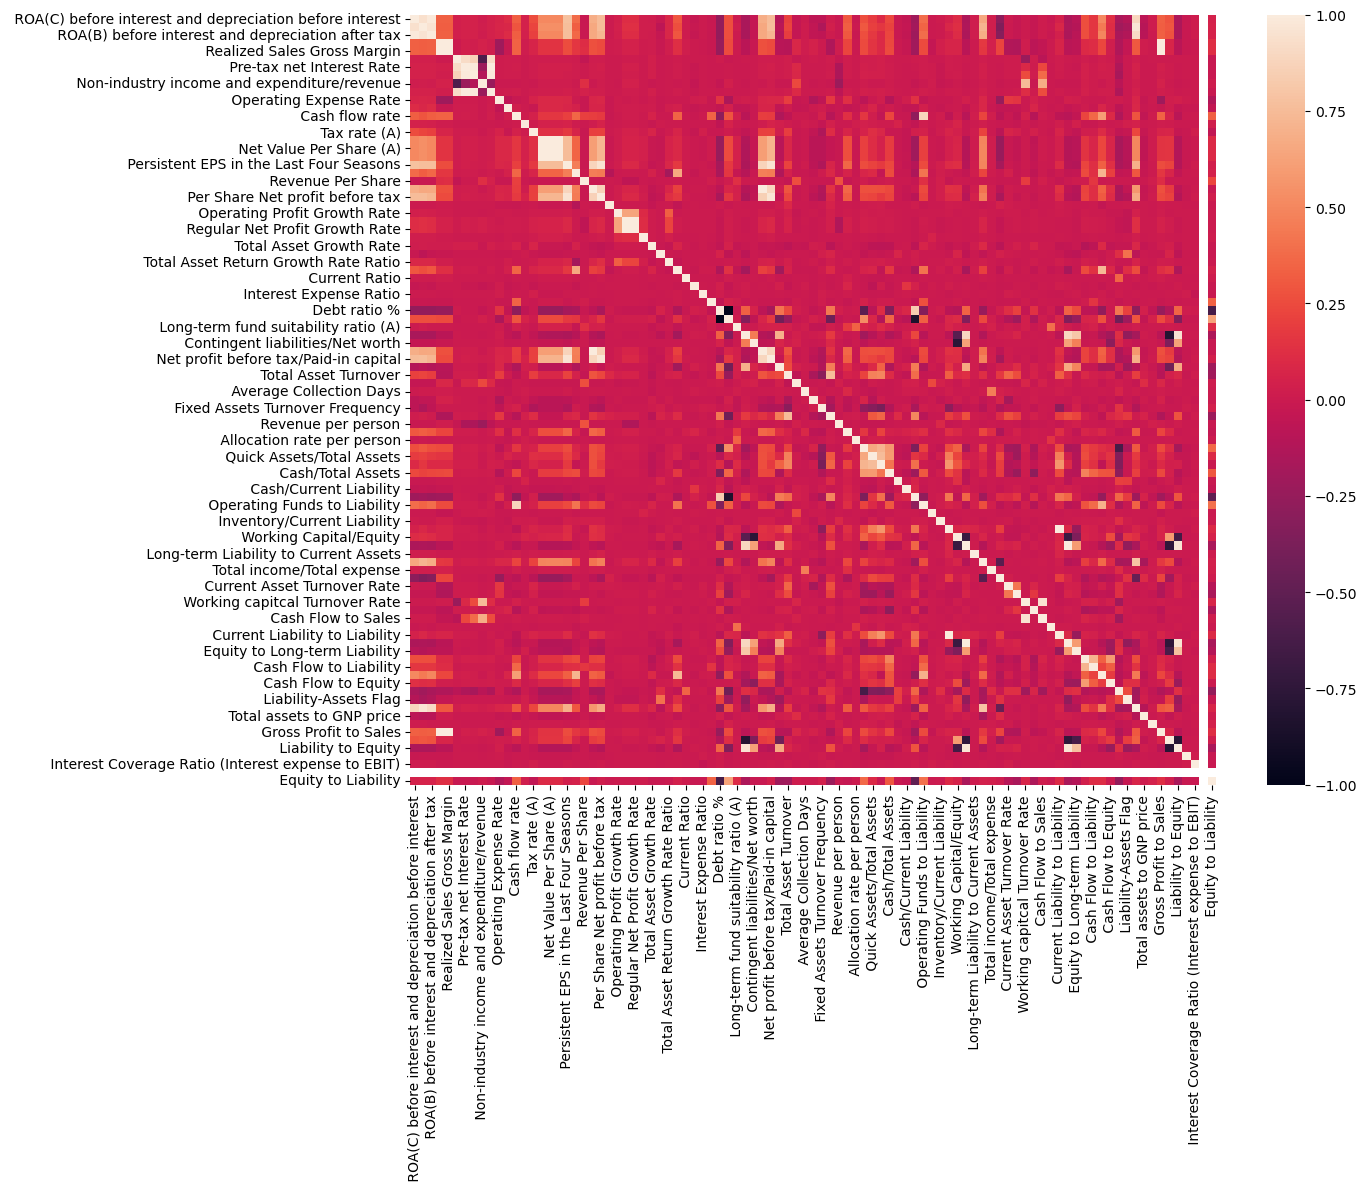

In [13]:
fig, ax = plt.subplots(figsize=(13, 10))
corr = df.drop(columns=["Bankrupt","Company"]).corr()
sns.heatmap(corr, ax=ax)
plt.savefig('corr_heatmap.png', dpi=100, bbox_inches='tight', facecolor='white')
plt.show()

In [14]:
#split
target ="Bankrupt"
X = df.drop(columns=["Bankrupt","Company"])
y = df[target]
print("X shape:", X.shape)
print("y shape:", y.shape)

X shape: (6819, 95)
y shape: (6819,)


In [15]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (5455, 95)
y_train shape: (5455,)
X_test shape: (1364, 95)
y_test shape: (1364,)


In [16]:
#Resampling
over_sampler =RandomOverSampler(random_state=42)
X_train_over, y_train_over = over_sampler.fit_resample(X_train,y_train)
print("X_train_over shape:", X_train_over.shape)
X_train_over.head()

X_train_over shape: (10572, 95)


,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,0.498513,0.542848,0.544622,0.599194,0.599036,0.998986,0.797412,0.809330,0.303528,0.781593,...,0.801313,0.005821,0.623649,0.599196,0.840580,0.282564,0.027239,0.566658,1,0.022512
1,0.506606,0.562309,0.558863,0.609334,0.609334,0.999027,0.797450,0.809375,0.303508,0.781637,...,0.810914,0.000481,0.623932,0.609332,0.841339,0.280570,0.026843,0.565395,1,0.026670
2,0.508799,0.561001,0.554687,0.614242,0.614055,0.999094,0.797533,0.809424,0.303514,0.781692,...,0.809740,0.001397,0.623714,0.614241,0.840969,0.277772,0.026864,0.565484,1,0.041556
3,0.499976,0.562527,0.546764,0.597825,0.597825,0.999004,0.797411,0.809329,0.303490,0.781590,...,0.810082,0.000998,0.623986,0.597824,0.841885,0.286871,0.026951,0.565820,1,0.018173
4,0.477892,0.547700,0.529150,0.600362,0.600362,0.998975,0.797412,0.809333,0.303551,0.781584,...,0.804638,0.002826,0.623845,0.600363,0.840885,0.282073,0.026959,0.565848,1,0.023328


In [17]:
acc_baseline = (y_train.value_counts(normalize=True)).max()
print("Baseline Accuracy:", round(acc_baseline, 4))

Baseline Accuracy: 0.969


In [18]:
#Building model
clf =RandomForestClassifier(random_state=42)
clf

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [19]:
#Evaluating different classifiers
cv_scores = cross_val_score(clf,X_train_over,y_train_over,cv=5,n_jobs=-1)
print(cv_scores)

[0.99196217 0.99479905 0.99479659 0.99668874 0.99479659]


In [20]:
params = {
    "max_depth": range(30, 50, 10),
    "n_estimators": range(25, 51, 25),
}

In [21]:
model = GridSearchCV(
    clf,
    param_grid=params,
    cv=5,
    n_jobs=-1,
    verbose=1
)
model

,estimator,RandomForestC...ndom_state=42)
,param_grid,"{'max_depth': range(30, 50, 10), 'n_estimators': range(25, 51, 25)}"
,scoring,None
,n_jobs,-1
,refit,True
,cv,5
,verbose,1
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_estimators,100


In [22]:
#model fitting
model.fit(X_train_over, y_train_over)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


,estimator,RandomForestC...ndom_state=42)
,param_grid,"{'max_depth': range(30, 50, 10), 'n_estimators': range(25, 51, 25)}"
,scoring,None
,n_jobs,-1
,refit,True
,cv,5
,verbose,1
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_estimators,50


In [23]:
cv_results = pd.DataFrame(model.cv_results_)
cv_results.head(5)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,1.979797,0.087061,0.019366,0.002825,30,25,"{'max_depth': 30, 'n_estimators': 25}",0.991489,0.991489,0.992904,0.991012,0.991958,0.991771,0.000641,4
1,3.520042,0.116463,0.026399,0.005116,30,50,"{'max_depth': 30, 'n_estimators': 50}",0.991017,0.992908,0.992904,0.993377,0.992431,0.992528,0.000813,3
2,1.732250,0.025220,0.016356,0.000679,40,25,"{'max_depth': 40, 'n_estimators': 25}",0.991017,0.994799,0.995270,0.994324,0.994797,0.994041,0.001542,2
3,3.072065,0.385537,0.021051,0.003202,40,50,"{'max_depth': 40, 'n_estimators': 50}",0.991489,0.995272,0.994797,0.995743,0.994797,0.994419,0.001506,1


In [24]:
best_params = model.best_params_
print(best_params)

{'max_depth': 40, 'n_estimators': 50}


In [25]:
acc_train = model.score(X_train,y_train)
acc_test = model.score(X_test,y_test)
print("Model Training Accuracy:", round(acc_train, 4))
print("Model Test Accuracy:", round(acc_test, 4))

Model Training Accuracy: 1.0
Model Test Accuracy: 0.9663


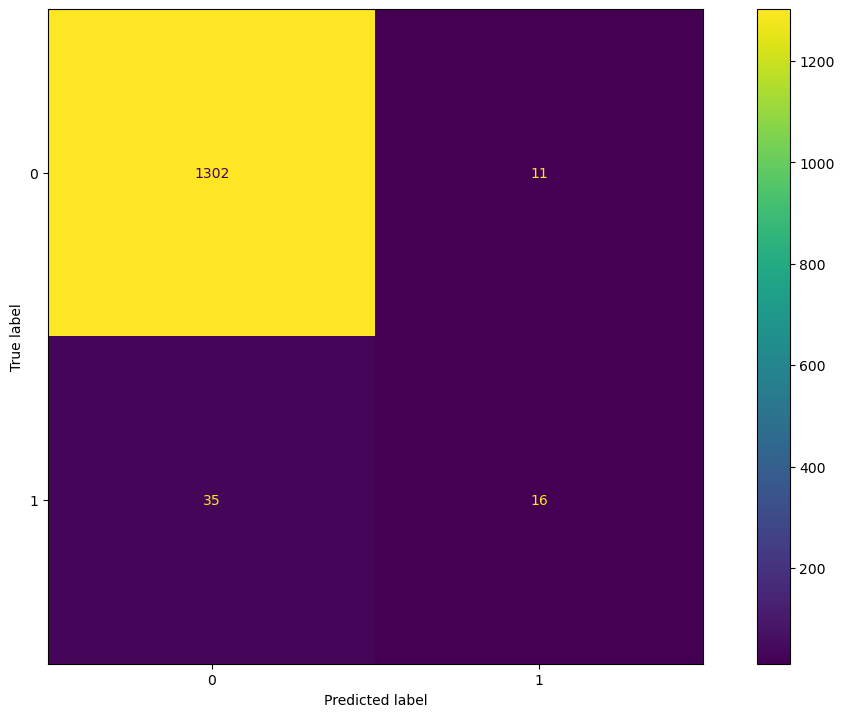

In [26]:
fig, ax = plt.subplots(figsize=(14, 8.5))
ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, ax=ax)
plt.savefig('confusionmatrix.png', dpi=100, bbox_inches='tight', facecolor='white')
plt.show()

In [27]:
class_report = classification_report(y_test,model.predict(X_test))
print(class_report)

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1313
           1       0.59      0.31      0.41        51

    accuracy                           0.97      1364
   macro avg       0.78      0.65      0.70      1364
weighted avg       0.96      0.97      0.96      1364



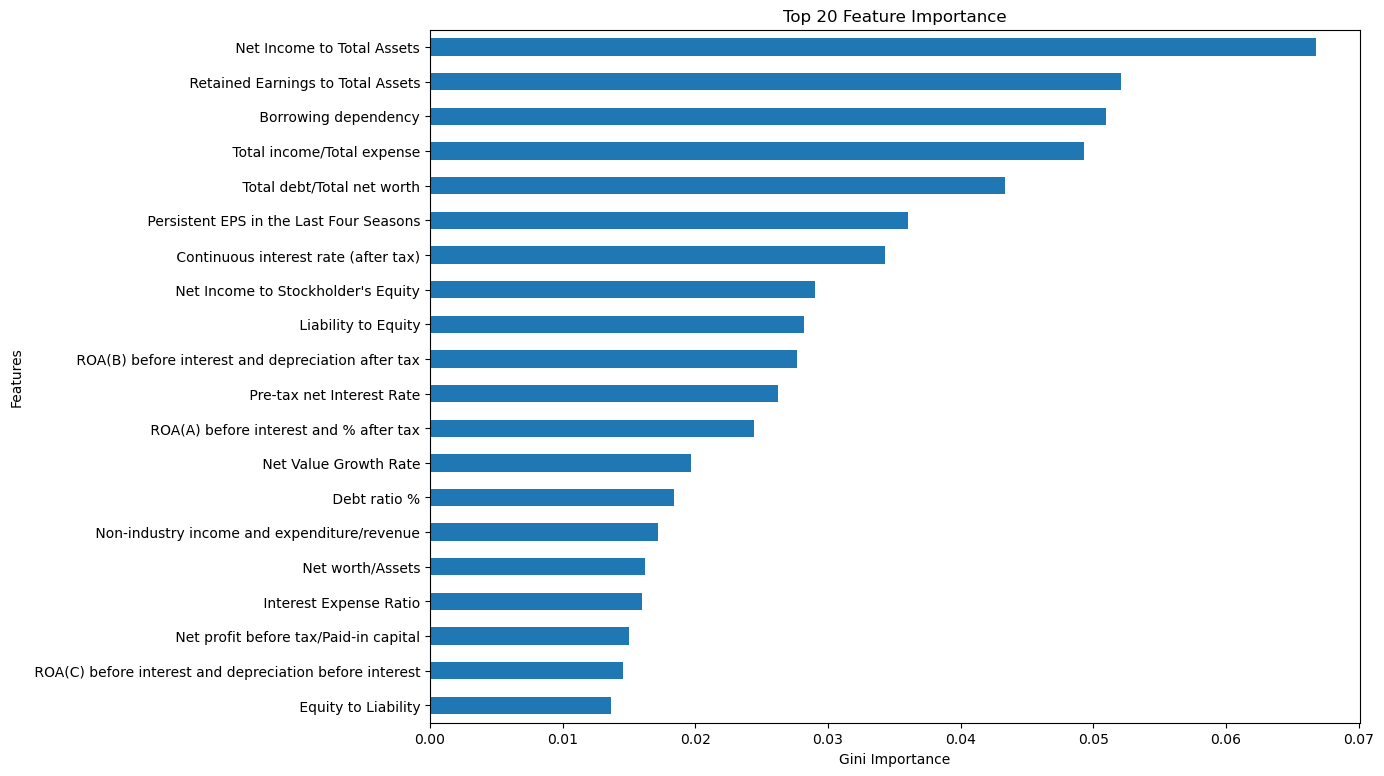

In [28]:
fig, ax = plt.subplots(figsize=(12, 9))
features = X_train_over.columns
importances = model.best_estimator_.feature_importances_
feat_imp = pd.Series(importances, index=features).sort_values(ascending=False)
feat_imp.head(20).plot(kind="barh", ax=ax)
ax.set_xlabel("Gini Importance")
ax.set_ylabel("Features")
ax.set_title("Top 20 Feature Importance")
ax.invert_yaxis()
plt.savefig('feature_importance.png', dpi=100, bbox_inches='tight', facecolor='white', pad_inches=0.2)
plt.show()

In [29]:
features=X_train_over.columns
importances=model.best_estimator_.feature_importances_
feat_imp=pd.Series(importances,index=features).sort_values()
feat_imp.tail(10)

 ROA(B) before interest and depreciation after tax    0.027663
 Liability to Equity                                  0.028215
 Net Income to Stockholder's Equity                   0.029038
 Continuous interest rate (after tax)                 0.034320
 Persistent EPS in the Last Four Seasons              0.036022
 Total debt/Total net worth                           0.043311
 Total income/Total expense                           0.049287
 Borrowing dependency                                 0.050997
 Retained Earnings to Total Assets                    0.052122
 Net Income to Total Assets                           0.066761
dtype: float64

In [30]:
# Save model
with open ("italian-bankruptcy-companies-model.pkl","wb") as f:
    pickle.dump(model,f)


wasted admin cost:5500
wasted legal cost:1750000


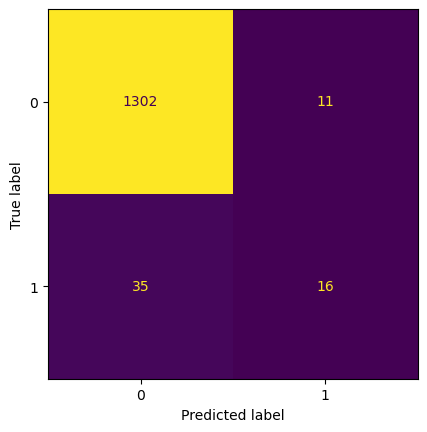

In [31]:
threshold=0.5
y_pred_proba=model.predict_proba(X_test)[:,1]
y_pred=y_pred_proba>threshold
conf_matrix=confusion_matrix(y_test,y_pred)
tn,fp,fn,tp=conf_matrix.ravel()
#fn sending bankruptcy information to a bank that did not go bankrupt
print(f"wasted admin cost:{fp*500}")
#fp everytime we donot send bankruptcy information to a bank that does goes bankrupt and 
#don"t file for bankruptcy protection
print(f"wasted legal cost:{fn*50_000}")
ConfusionMatrixDisplay.from_predictions(y_test,y_pred,colorbar=False);





In [2]:
#The administrative costs of sending information to a company is €500. 
#The legal costs to the Italian court system if a company doesn't file for protection before bankruptcy is €50,000.
def make_cnf_matrix(threshold):
    y_pred_proba=model.predict_proba(X_test)[:,1]
    y_pred=y_pred_proba>threshold
    conf_matrix=confusion_matrix(y_test,y_pred)
    tn,fp,fn,tp=conf_matrix.ravel()
    #fn sending bankruptcy information to a bank that did not go bankrupt
    print(f"wasted admin cost: €{fp*500}")
    #fp everytime we donot send bankruptcy information to a bank that does goes bankrupt and 
    #don"t file for bankruptcy protection
    print(f"wasted legal cost: €{fn*50_000}")
    ConfusionMatrixDisplay.from_predictions(y_test,y_pred,colorbar=False)
    plt.savefig('Interactive confusion matrix .png', dpi=100, bbox_inches='tight', facecolor='white', pad_inches=0.2)



thresh_widget = widgets.FloatSlider(min=0,max=1,value=0.5,step=0.05)

interact(make_cnf_matrix, threshold=thresh_widget);


interactive(children=(FloatSlider(value=0.5, description='threshold', max=1.0, step=0.05), Output()), _dom_cla…